This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [2]:
import os
os.sys.path.append('../../')

# Transforming the massplane into an angular coordinate system

Let's try to transform the $m(H1)$ and $m(H2)$ massplane into a polar coordinate system to hopefully encode information about the extrapolation of the signal region.
For this we'll start with a 2b dataset.

In [3]:
!ls -lh /mnt/storage/lborgna/NNT/data17_with_weights.root

-rw-r--r-- 1 lborgna users 5.8G Oct  1 12:07 /mnt/storage/lborgna/NNT/data17_with_weights.root


In [13]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
f = uproot.open('/mnt/storage/lborgna/NNT/data17_with_weights.root')

In [6]:
f.keys()

[b'validation;1',
 b'control;1',
 b'sig;1',
 b'fullmassplane;1',
 b'NN_norm_bstrap_med_17;1',
 b'NN_norm_bstrap_IQR_17;1',
 b'NN_norm_bstrap_perc_25_17;1',
 b'NN_norm_bstrap_perc_75_17;1',
 b'NN_norm_VRderiv_bstrap_med_17;1',
 b'NN_norm_VRderiv_bstrap_IQR_17;1',
 b'NN_norm_VRderiv_bstrap_perc_25_17;1',
 b'NN_norm_VRderiv_bstrap_perc_75_17;1']

In [7]:
df = f["fullmassplane"].pandas.df(
    ["m_hh_cor", "m_h1", "m_h2", "ntag", "kinematic_region"]
)

In [8]:
df.head()

m_hh_cor        m_h1        m_h2  ntag  kinematic_region
entry                                                            
0      447.474228  338.054962   57.719505     2                 3
1      390.561187  121.129082  207.788071     2                 3
2      689.710329  448.122803  148.290710     2                 3
3      324.864754  277.710785  363.861145     2                 3
4      400.409339  172.157227   97.524261     2                 3

In [9]:
import eda_tools

In [10]:
from eda_tools.plot_helper import massplane

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


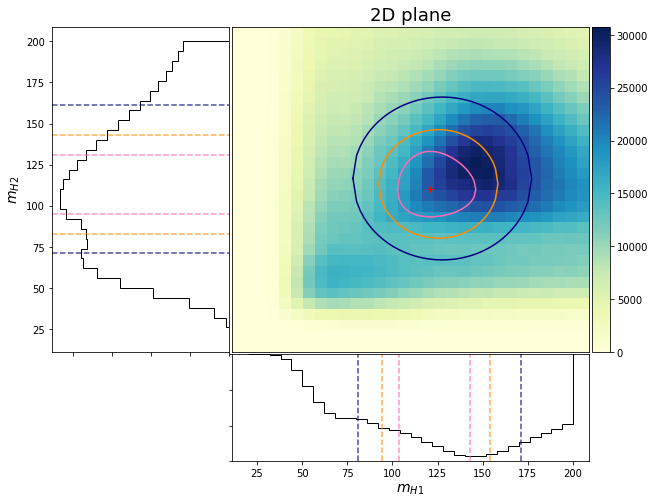

In [11]:
h = massplane(df.loc[df.ntag==2])
h['main_ax'].plot(120,110, '+', color = 'red')

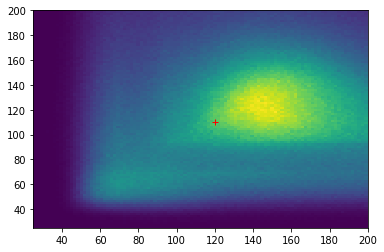

In [14]:
_ = plt.hist2d(df['m_h1'].values, df['m_h2'].values, range=((25, 200), (25, 200)), bins =(100, 100))
plt.plot(120, 110, '+', color='red')

In [15]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return r, theta

In [16]:
r, theta = cartesian_to_polar(df.m_h1.values, df.m_h2.values)

In [17]:
import matplotlib.pyplot as plt

In [18]:
df['r'] = r
df['theta'] = theta

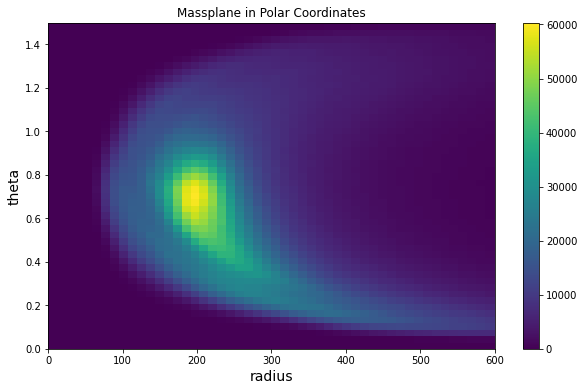

In [19]:
f, ax = plt.subplots(figsize=(10, 6))
_ = plt.hist2d(df['r'].values,df['theta'].values, range=((0, 600), (0, 1.5)), bins = (50, 50))
plt.xlabel('radius', fontsize = 14)
plt.ylabel('theta', fontsize = 14)
plt.title("Massplane in Polar Coordinates")
plt.colorbar()

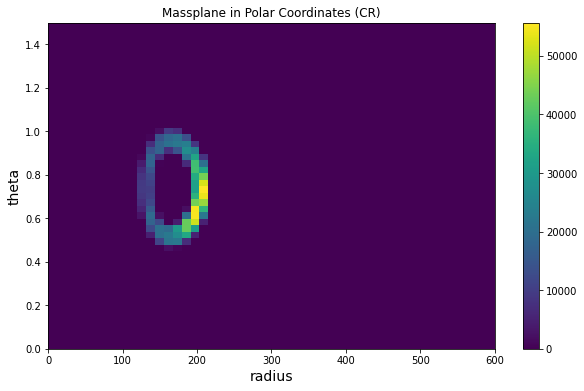

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
_ = plt.hist2d(df.loc[df.kinematic_region==2,'r'].values,df.loc[df.kinematic_region==2,'theta'].values, range=((0, 600), (0, 1.5)), bins = (50, 50))
plt.xlabel('radius', fontsize = 14)
plt.ylabel('theta', fontsize = 14)
plt.title("Massplane in Polar Coordinates (CR)")
plt.colorbar()

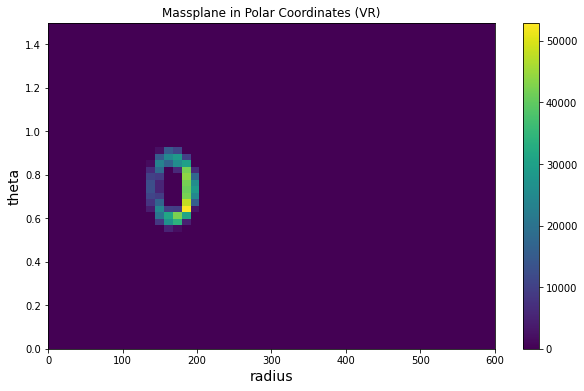

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
_ = plt.hist2d(df.loc[df.kinematic_region==1,'r'].values,df.loc[df.kinematic_region==1,'theta'].values, range=((0, 600), (0, 1.5)), bins = (50, 50))
plt.xlabel('radius', fontsize = 14)
plt.ylabel('theta', fontsize = 14)
plt.title("Massplane in Polar Coordinates (VR)")
plt.colorbar()

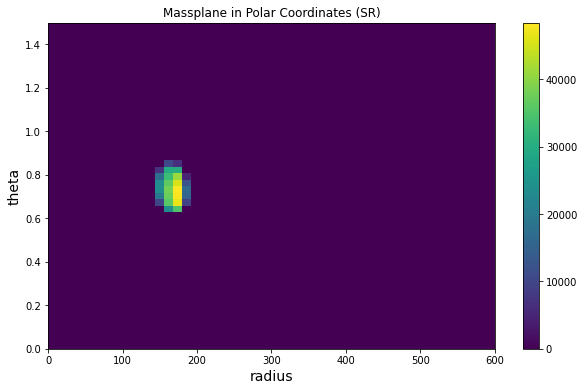

In [22]:
f, ax = plt.subplots(figsize=(10, 6))
_ = plt.hist2d(df.loc[df.kinematic_region==0,'r'].values,df.loc[df.kinematic_region==0,'theta'].values, range=((0, 600), (0, 1.5)), bins = (50, 50))
plt.xlabel('radius', fontsize = 14)
plt.ylabel('theta', fontsize = 14)
plt.title("Massplane in Polar Coordinates (SR)")
plt.colorbar()

Text(0.5, 1.0, '2b, r distribution')

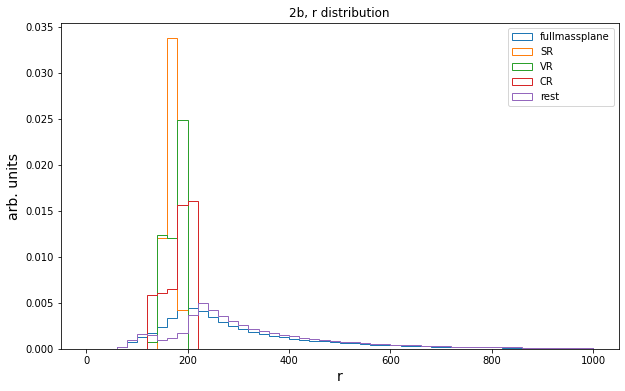

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
_, _, _ = plt.hist(
    df.loc[df.ntag == 2, "r"].values,
    bins=50,
    histtype="step",
    range=(0, 1000),
    label="fullmassplane",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 0), "r"].values,
    bins=50,
    histtype="step",
    range=(0, 1000),
    label="SR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 1), "r"].values,
    bins=50,
    histtype="step",
    range=(0, 1000),
    label="VR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 2), "r"].values,
    bins=50,
    histtype="step",
    range=(0, 1000),
    label="CR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 3), "r"].values,
    bins=50,
    histtype="step",
    range=(0, 1000),
    label="rest",
    density=True,
)
plt.legend()
plt.xlabel('r', fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
plt.title('2b, r distribution')

Text(0.5, 1.0, '2b, theta distribution')

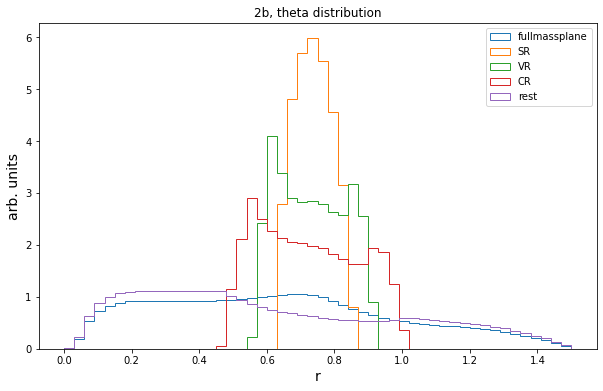

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
_, _, _ = plt.hist(
    df.loc[df.ntag == 2, "theta"].values,
    bins=50,
    histtype="step",
    range=(0, 1.5),
    label="fullmassplane",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 0), "theta"].values,
    bins=50,
    histtype="step",
    range=(0, 1.5),
    label="SR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 1), "theta"].values,
    bins=50,
    histtype="step",
    range=(0, 1.5),
    label="VR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 2), "theta"].values,
    bins=50,
    histtype="step",
    range=(0, 1.5),
    label="CR",
    density=True,
)
_, _, _ = plt.hist(
    df.loc[(df.ntag == 2) & (df.kinematic_region == 3), "theta"].values,
    bins=50,
    histtype="step",
    range=(0, 1.5),
    label="rest",
    density=True,
)
plt.legend()
plt.xlabel('r', fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
plt.title('2b, theta distribution')

### Centering the signal region

Below are the regions definitions that are in the internal note. This will help us understand how to center signal region.

![image](regions_definitions.png)

Let's center the massplane by putting the middle of the signal region at the point where r = 0. This is not so easy since the signal region does not have a nice circular shape. However we know from the region definition of the internal note that this is centered at $m(H_1)$ = 120 GeV and $m(H_2)$ = 110 GeV (note that its slightly lower from the higgs mass of ~ 125 GeV

In [25]:
df['m_h1_cen'] = df['m_h1'] - 120
df['m_h2_cen'] = df['m_h2'] - 110

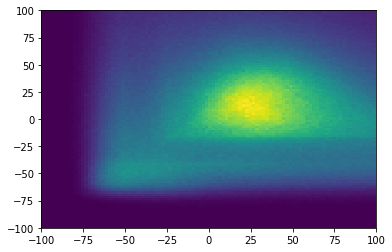

In [26]:
_ = plt.hist2d(df['m_h1_cen'].values, df['m_h2_cen'].values, range=((-100, 100), (-100, 100)), bins = (100, 100))

In [27]:
r_c, theta_c = cartesian_to_polar(df['m_h1_cen'].values, df['m_h2_cen'].values)

In [28]:
df['r_c'] = r_c
df['theta_c'] = theta_c

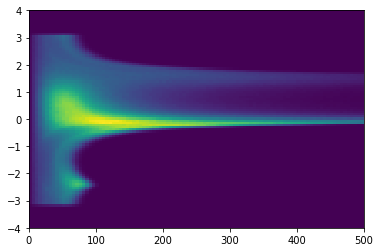

In [29]:
_ = plt.hist2d(df['r_c'].values, df['theta_c'].values, bins = (100, 100), range=((0, 500), (-4, 4)))

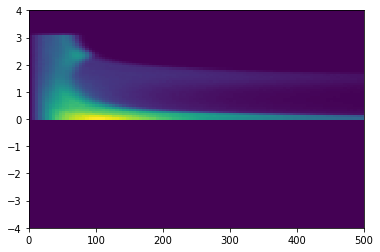

In [97]:
_ = plt.hist2d(df['r_c'].values, df['theta_c'].abs().values, bins = (100, 100), range=((0, 500), (-4, 4)))

Text(0, 0.5, '$\\theta$ (centered)')

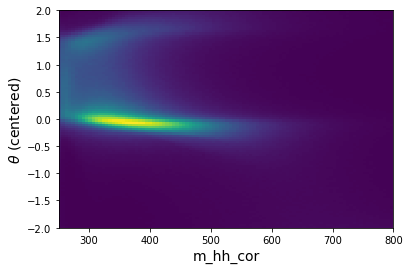

In [98]:
_ = plt.hist2d(
    df["m_hh_cor"].values,
    df["theta_c"].values,
    bins=(100, 100),
    range=((250, 800), (-2, 2)),
)
plt.xlabel("m_hh_cor", fontsize=14)
plt.ylabel(r"$\theta$ (centered)", fontsize=14)

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$log(|\\theta|)$ (centered)')

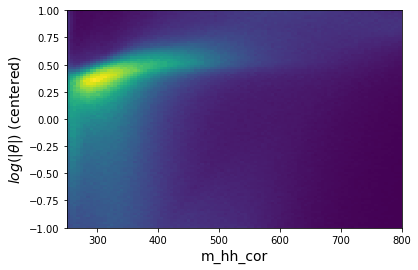

In [96]:
_ = plt.hist2d(
    df["m_hh_cor"].values,
    np.log(df["theta_c"].abs().values),
    bins=(100, 100),
    range=((250, 800), (-1, 1)),
)
plt.xlabel("m_hh_cor", fontsize=14)
plt.ylabel(r"$log(|\theta|)$ (centered)", fontsize=14)

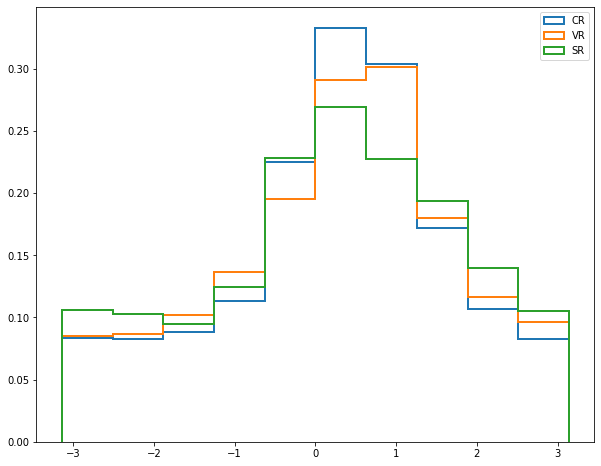

In [30]:
fig, ax = plt.subplots(figsize=(10, 8 ))
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
_,_,_ = plt.hist(df.loc[df.kinematic_region==2, 'theta_c'].values, histtype='step', lw = 2, label = 'CR', density = True)
_,_,_ = plt.hist(df.loc[df.kinematic_region==1, 'theta_c'].values, histtype='step', lw = 2, label = 'VR', density = True)
_,_,_ = plt.hist(df.loc[df.kinematic_region==0, 'theta_c'].values, histtype='step', lw = 2, label = 'SR', density = True)
plt.legend()


This looks good however there's two issues with this plot.
1. Its showing the combination of 2b, 3b and 4b events so when we look at the signal region this is clearly going to look different since there won't be any 3b or 4b events in there. but ok.
2. There's also a clear periodicity of the angular variable so we need to apply a further transformation to convert this to a smoother distribution. 

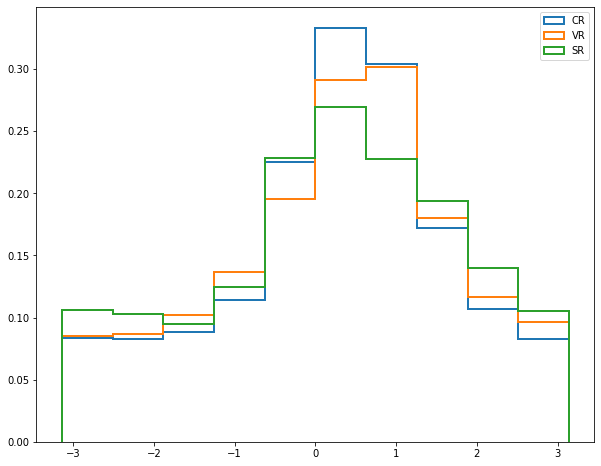

In [31]:
fig, ax = plt.subplots(figsize=(10, 8 ))
mask2b=df['ntag']==2
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==2)&mask2b, 'theta_c'].values, histtype='step', lw = 2, label = 'CR', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==1)&mask2b, 'theta_c'].values, histtype='step', lw = 2, label = 'VR', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].values, histtype='step', lw = 2, label = 'SR', density = True)
plt.legend()



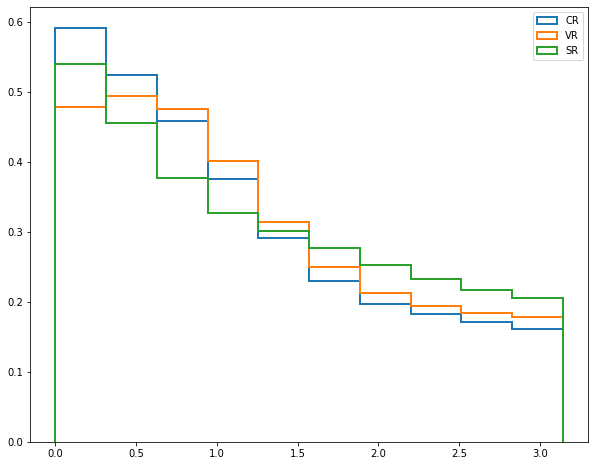

In [32]:
fig, ax = plt.subplots(figsize=(10, 8 ))
mask2b=df['ntag']==2
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==2)&mask2b, 'theta_c'].abs().values, histtype='step', lw = 2, label = 'CR', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==1)&mask2b, 'theta_c'].abs().values, histtype='step', lw = 2, label = 'VR', density = True)
_,_,_ = plt.hist(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].abs().values, histtype='step', lw = 2, label = 'SR', density = True)
plt.legend()




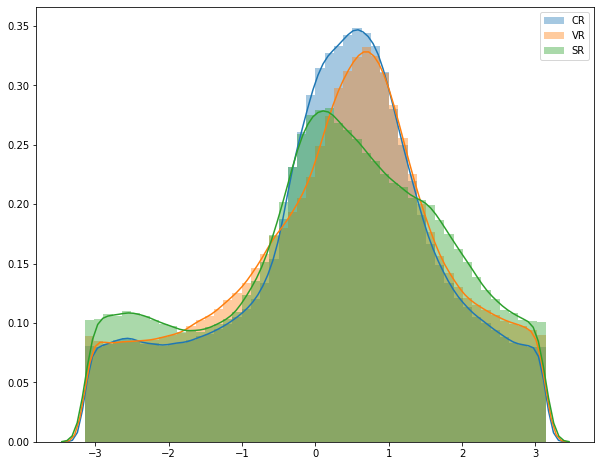

In [33]:
fig, ax = plt.subplots(figsize=(10, 8 ))
mask2b=df['ntag']==2
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
sns.distplot(df.loc[(df.kinematic_region==2)&mask2b, 'theta_c'].values, kde=True, label = 'CR')
sns.distplot(df.loc[(df.kinematic_region==1)&mask2b, 'theta_c'].values, kde=True, label = 'VR')
sns.distplot(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].values, kde=True, label = 'SR')
plt.legend()





In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8 ))
mask2b=df['ntag']==2
mask4b=df['ntag']>=4
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
sns.distplot(df.loc[(df.kinematic_region==2)&mask2b, 'theta_c'].values, kde=True, label = '2b - CR', ax =ax[0])
sns.distplot(df.loc[(df.kinematic_region==2)&mask4b, 'theta_c'].values, kde=True, label = '4b -CR', ax=ax[0])

sns.distplot(df.loc[(df.kinematic_region==1)&mask2b, 'theta_c'].values, kde=True, label = '2b - VR', ax=ax[1])
sns.distplot(df.loc[(df.kinematic_region==1)&mask4b, 'theta_c'].values, kde=True, label = '4b - VR', ax=ax[1])

#sns.distplot(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].abs().values, kde=True, label = 'SR')
ax[0].legend()
ax[1].legend()





In [72]:
(be[:-1] + be[1:])/2

array([-3.0782604 , -2.9526274 , -2.8269944 , -2.7013617 , -2.5757287 ,
       -2.4500957 , -2.324463  , -2.1988301 , -2.073197  , -1.9475641 ,
       -1.8219311 , -1.6962984 , -1.5706654 , -1.4450324 , -1.3193996 ,
       -1.1937666 , -1.0681337 , -0.94250077, -0.8168678 , -0.69123495,
       -0.56560206, -0.43996912, -0.31433618, -0.18870328, -0.06307037,
        0.06256254,  0.18819545,  0.31382835,  0.4394613 ,  0.56509423,
        0.6907271 ,  0.81636   ,  0.94199294,  1.0676259 ,  1.1932588 ,
        1.3188918 ,  1.4445245 ,  1.5701575 ,  1.6957905 ,  1.8214233 ,
        1.9470563 ,  2.072689  ,  2.1983223 ,  2.323955  ,  2.4495878 ,
        2.5752208 ,  2.7008538 ,  2.8264866 ,  2.9521196 ,  3.0777526 ],
      dtype=float32)

In [73]:
x

array([-3.07826042, -2.95262742, -2.82699442, -2.70136166, -2.57572865,
       -2.45009565, -2.32446289, -2.19883013, -2.07319689, -1.94756413,
       -1.82193112, -1.69629836, -1.57066536, -1.44503236, -1.3193996 ,
       -1.19376659, -1.06813371, -0.94250077, -0.81686783, -0.69123495,
       -0.56560206, -0.43996912, -0.31433618, -0.18870328, -0.06307037,
        0.06256254,  0.18819545,  0.31382835,  0.43946129,  0.56509423,
        0.69072711,  0.81636   ,  0.94199294,  1.06762588,  1.19325876,
        1.31889176,  1.44452453,  1.57015753,  1.69579053,  1.82142329,
        1.94705629,  2.07268906,  2.1983223 ,  2.32395506,  2.44958782,
        2.57522082,  2.70085382,  2.82648659,  2.95211959,  3.07775259])

In [64]:
from eda_tools import histogram_helper as hh

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
mask2b = df["ntag"] == 2
mask4b = df["ntag"] >= 4
maskCR = df["kinematic_region"] == 2
maskVR = df["kinematic_region"] == 1
# _,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
y, be = np.histogram(df.loc[maskCR & mask4b, "theta_c"].values, bins=50)
x = hh.bin_midpoint(be)
df_2b_cr = df.loc[maskCR & mask2b]
w = np.sum(y) * np.ones(df_2b_cr.shape[0]) / df_2b_cr.shape[0]
_, be, _ = ax[0].hist(
    df.loc[maskCR & mask2b, "theta_c"].values,
    bins=be,
    weights=w,
    label="2b - CR",
    histtype="step",
)


ax[0].plot(x, y, "+", color="black", label="4b - CR")

y, be = np.histogram(df.loc[maskVR & mask4b, "theta_c"].values, bins=50)
x = hh.bin_midpoint(be)
df_2b_vr = df.loc[maskVR & mask2b]
w = np.sum(y) * np.ones(df_2b_vr.shape[0]) / df_2b_vr.shape[0]
_, be, _ = ax[1].hist(
    df.loc[maskVR & mask2b, "theta_c"].values,
    bins=be,
    weights=w,
    label="2b - VR",
    histtype="step",
)
ax[1].plot(x, y, "+", color="black", label="4b - VR")


# sns.distplot(df.loc[maskCR&mask4b, 'theta_c'].values, kde=True, label = '4b -CR', ax=ax[0])

# sns.distplot(df.loc[maskVR&mask2b, 'theta_c'].values, kde=True, label = '2b - VR', ax=ax[1])
# sns.distplot(df.loc[maskVR&mask4b, 'theta_c'].values, kde=True, label = '4b - VR', ax=ax[1])

# sns.distplot(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].abs().values, kde=True, label = 'SR')
ax[0].legend()
ax[1].legend()
plt.subplots_adjust(hspace=0)
plt.xlabel(r"$\theta$ [rad]", fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
ax[0].set_title('Angular Massplane distribution')

Text(0.5, 1.0, 'Angular Massplane distribution')

In [80]:
np.log(-3)

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
mask2b = df["ntag"] == 2
mask4b = df["ntag"] >= 4
maskCR = df["kinematic_region"] == 2
maskVR = df["kinematic_region"] == 1
# _,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
y, be = np.histogram(np.log(df.loc[maskCR & mask4b, "theta_c"].abs().values), bins=50)
x = hh.bin_midpoint(be)
df_2b_cr = df.loc[maskCR & mask2b]
w = np.sum(y) * np.ones(df_2b_cr.shape[0]) / df_2b_cr.shape[0]
_, be, _ = ax[0].hist(
    np.log(df.loc[maskCR & mask2b, "theta_c"].abs().values),
    bins=be,
    weights=w,
    label="2b - CR",
    histtype="step",
)


ax[0].plot(x, y, "+", color="black", label="4b - CR")

y, be = np.histogram(np.log(df.loc[maskVR & mask4b, "theta_c"].abs().values), bins=50)
x = hh.bin_midpoint(be)
df_2b_vr = df.loc[maskVR & mask2b]
w = np.sum(y) * np.ones(df_2b_vr.shape[0]) / df_2b_vr.shape[0]
_, be, _ = ax[1].hist(
    np.log(df.loc[maskVR & mask2b, "theta_c"].abs().values),
    bins=be,
    weights=w,
    label="2b - VR",
    histtype="step",
)
ax[1].plot(x, y, "+", color="black", label="4b - VR")


# sns.distplot(df.loc[maskCR&mask4b, 'theta_c'].values, kde=True, label = '4b -CR', ax=ax[0])

# sns.distplot(df.loc[maskVR&mask2b, 'theta_c'].values, kde=True, label = '2b - VR', ax=ax[1])
# sns.distplot(df.loc[maskVR&mask4b, 'theta_c'].values, kde=True, label = '4b - VR', ax=ax[1])

# sns.distplot(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].abs().values, kde=True, label = 'SR')
ax[0].legend()
ax[1].legend()
plt.subplots_adjust(hspace=0)
plt.xlabel(r"$log(|\theta|)$ [rad]", fontsize = 14)
plt.ylabel('arb. units', fontsize = 14)
ax[0].set_ylabel('arb.units', fontsize=14)
ax[0].set_title('Angular Massplane distribution')

Text(0.5, 1.0, 'Angular Massplane distribution')

In [55]:
ax[0]

<AxesSubplot:>

In [54]:
ax.shape

(2,)

In [238]:
df.loc[df['theta_c'] < -3]

m_hh_cor        m_h1        m_h2  ntag  kinematic_region  \
entry                                                                   
129        597.681398  103.443527  108.018860     2                 1   
154        660.879229   78.076324  105.379463     2                 3   
445        477.057114   74.317551  105.224190     2                 3   
524        652.556841   47.658890  103.619965     2                 3   
1232       847.384751   57.572899  101.919281     2                 3   
...               ...         ...         ...   ...               ...   
20816509   418.241993  100.854179  108.882782     2                 1   
20816532   540.871567   68.544350  107.887955     2                 3   
20816599   562.127978   77.840332  105.172440     2                 3   
20817190  1007.260349   70.887093  105.294029     2                 3   
20817198   804.890666   72.249786  104.156998     2                 3   

                   r     theta   m_h1_cen  m_h2_cen        r_c   theta_c  
entry                                                                     
129       149.561478  0.807031 -16.556473 -1.981140  16.674583 -3.022499  
154       131.151611  0.933141 -41.923676 -4.620537  42.177528 -3.031823  
445       128.822464  0.955869 -45.682449 -4.775810  45.931412 -3.037427  
524       114.054665  1.139708 -72.341110 -6.380035  72.621910 -3.053627  
1232      117.056305  1.056595 -62.427101 -8.080719  62.947926 -3.012866  
...              ...       ...        ...       ...        ...       ...  
20816509  148.415039  0.823659 -19.145821 -1.117218  19.178389 -3.083306  
20816532  127.820732  1.004804 -51.455650 -2.112045  51.498978 -3.100570  
20816599  130.844788  0.933648 -42.159668 -4.827560  42.435162 -3.027583  
20817190  126.932312  0.978264 -49.112907 -4.705971  49.337856 -3.046065  
20817198  126.762421  0.964337 -47.750214 -5.843002  48.106377 -3.019832  

[110460 rows x 11 columns]

In [44]:
mask3 = df['theta_c'] <= -2

In [45]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
_ = ax[0].hist2d(
    df.loc[mask3, "m_h1_cen"].values, 
    df.loc[mask3, "m_h2_cen"].values,
    bins = 100,
    range = ((-100, 100), (-100, 100))
)
_ = ax[1].hist2d(
    df['m_h1_cen'].values,
    df['m_h2_cen'].values,
    bins = 100,
    range = ((-100, 100), (-100, 100))
)

No handles with labels found to put in legend.


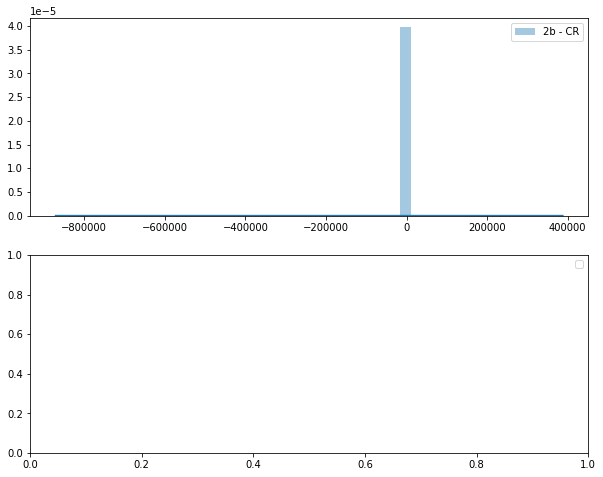

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8 ))
mask2b=df['ntag']==2
mask4b=df['ntag']>=4
#_,_,_ = plt.hist(df['theta_c'].values, histtype = 'step', lw = 2, label = 'all', density = True)
sns.distplot(np.tan(df.loc[(df.kinematic_region==2)&mask2b, 'theta_c'].values), kde=True, label = '2b - CR', ax =ax[0])
#sns.distplot(df.loc[(df.kinematic_region==2)&mask4b, 'theta_c'].values, kde=True, label = '4b -CR', ax=ax[0])

#sns.distplot(df.loc[(df.kinematic_region==1)&mask2b, 'theta_c'].values, kde=True, label = '2b - VR', ax=ax[1])
#sns.distplot(df.loc[(df.kinematic_region==1)&mask4b, 'theta_c'].values, kde=True, label = '4b - VR', ax=ax[1])

#sns.distplot(df.loc[(df.kinematic_region==0)&mask2b, 'theta_c'].abs().values, kde=True, label = 'SR')
ax[0].legend()
ax[1].legend()






In [ ]:
plt.hist(df)

In [236]:
x_back

entry
0           218.054947
1             1.129085
2           328.122772
3           157.710770
4            52.157227
               ...    
20817326    164.881927
20817327     27.679871
20817328    135.629227
20817329    536.449829
20817330     82.460052
Length: 20817331, dtype: float32

In [46]:
df['r'].max()

6897.6313

In [48]:
df['r'].mean()

318.67792

In [49]:
df['r'].median()

256.50153

In [47]:
df['r'].min()

48.993706

# Understanding 2-D distributions.

Let's generate a 2d gaussian distribution so that we can play around with the angular transformations

In [116]:
x = np.random.normal( size = 1000000)

In [117]:
y= np.random.normal(size = 1000000)

In [140]:
f, ax = plt.subplots(figsize=(10,6))
_ = plt.hist2d(x,y, bins = 100, range = ((-3, 3), (-3, 3)))
plt.axvline(0,color='black')
plt.axhline(0, color='black')

In [178]:
f, ax = plt.subplots(figsize=(10,6))
_ = plt.hist2d(x[q1_mask],y[q1_mask], bins = 100, range = ((-3, 3), (-3, 3)))
plt.axvline(0,color='black')
plt.axhline(0, color='black')

In [145]:
sns.distplot(x=x, y=y)

TypeError: distplot() got an unexpected keyword argument 'x'

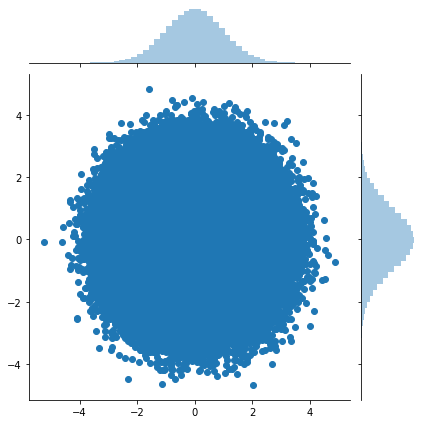

In [141]:
sns.jointplot(x,y)

In [125]:
g_r, g_theta = cartesian_to_polar(x, y)

In [126]:
g_r

array([0.26599628, 0.68642215, 1.23669015, ..., 1.60092161, 1.27372339,
       0.82461136])

In [127]:
g_theta

array([-1.46633568, -0.32214933,  1.30614072, ...,  1.03809334,
        2.67345571, -1.25059598])

In [130]:
import seaborn as sns

<AxesSubplot:>

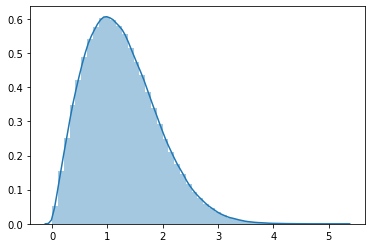

In [132]:
sns.distplot(g_r, kde=True)

In [134]:
sns.distplot(g_theta, kde=True)

<AxesSubplot:>

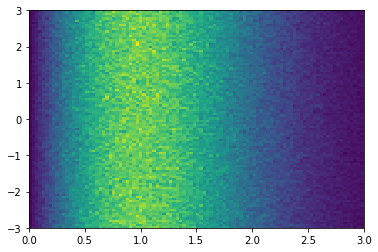

In [136]:
_ = plt.hist2d(g_r, g_theta, bins = 100, range=((0, 3), (-3, 3)))

In [164]:
theta_1

array([-2.34487061, -2.34847967,  0.93907798, ...,  0.97083354,
        0.83379283, -2.27440571])

In [156]:
def cartesian_to_polar2(x, y, arctan_type='2'):
    r = np.sqrt((x)**2 + (y)**2)
    if arctan_type == '1':
        theta = np.arctan(y,x)
    elif arctan_type == '2':
        theta = np.arctan2(y,x)
    return r, theta

In [163]:
y

array([-0.26454632, -0.21732541,  1.19363187, ...,  1.37909387,
        0.57473514, -0.78269833])

In [157]:
r_1, theta_1 = cartesian_to_polar2(x, y, arctan_type='2')

In [161]:
_ = plt.hist2d(theta_1, r_1, bins = 100, range=((0, 2), (-3.14, 3.14)))

<AxesSubplot:>

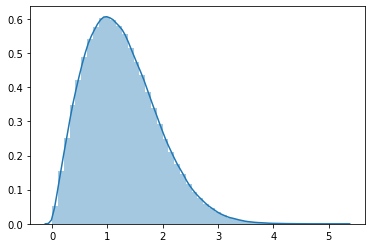

In [167]:
sns.distplot(g_r, kde = True)

<AxesSubplot:>

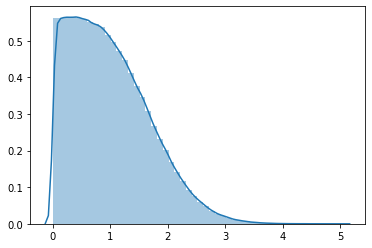

In [166]:
sns.distplot(r_1, kde = True)

<AxesSubplot:>

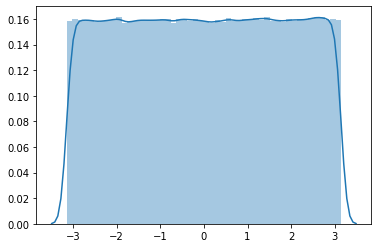

In [168]:
sns.distplot(g_theta, kde = True)

In [179]:
q1_mask = (x>0) & (y>0) & (x < 2 ) & (y<2)

<AxesSubplot:>

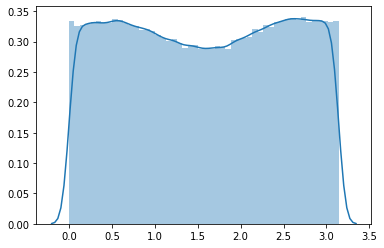

In [180]:
sns.distplot(g_theta[q1_mask], kde=True)

<AxesSubplot:>

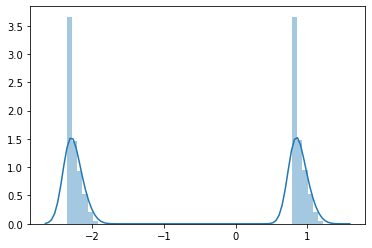

In [165]:
sns.distplot(theta_1, kde=True)

Testing the arctan function

In [51]:
x_pi = np.arange(0, 2*3.14, 0.001)

In [52]:
x_pi

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 6.277e+00, 6.278e+00,
       6.279e+00])